# Spotify x Billboard Five Year Analysis Project: Python Data Analysis

In-depth analyses including KMeans for grouping tracks by features, genre classification via KNN and Random Forest 

## Imports

### Packages

In [1]:
import json
import creds
import spotipy
from IPython.core.display import clear_output
from spotipy import SpotifyClientCredentials, util
import time
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from yellowbrick.cluster import KElbowVisualizer
from itertools import permutations
from tqdm import tqdm
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

### Settings

In [2]:
pd.set_option('display.max_columns', 75)

### Data

In [3]:
atacj = pd.read_csv('../data/AllTracksAndChartsJoined.csv')
atacj

,playlist_id,playlist_name,chart_position,album_release_date,release_year,release_date_datetime,album_id,album_artist,track_name,track_id,track_popularity,track_artists,track_artists_ids,track_artists_genres,track_artists_popularity,track_explicit,track_artists_followers,album_name,danceability,energy,key,speechiness,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_artist,track_artist_id,track_artist_popularity,track_artist_followers,track_artists_genres_consolidate,main_genre,Soundtrack,Rock,Pop,Hip-hop,Edm,Latin,Indie,Christian,Country,Soul,Metal,Jazz,Folk,Funk,Misc,Easy_listening,R&B,Reggae,Show_tunes,No Genre Assigned
0,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,1,2021-01-08,2021,2021-01-08,1qW1C4kDOXnrly22daHbxz,Morgan Wallen,Sand In My Boots,4qeMbs55QlONyrE9YBMA93,42,['Morgan Wallen'],['4oUHIQIBe0LHzYfvXNW4QM'],['contemporary country'],[86],False,[2789002],Dangerous: The Double Album,0.354,0.540,3,0.0323,-6.625,1,0.58700,0.000000,0.1120,0.416,69.970,202133,4,Morgan Wallen,4oUHIQIBe0LHzYfvXNW4QM,86,2789002,['Country'],Country,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,1,2021-01-08,2021,2021-01-08,1qW1C4kDOXnrly22daHbxz,Morgan Wallen,Wasted On You,4xv9BDq764NSKG3geku9X2,42,['Morgan Wallen'],['4oUHIQIBe0LHzYfvXNW4QM'],['contemporary country'],[86],False,[2789002],Dangerous: The Double Album,0.505,0.658,11,0.0318,-5.240,0,0.37100,0.001360,0.1210,0.255,196.002,178520,3,Morgan Wallen,4oUHIQIBe0LHzYfvXNW4QM,86,2789002,['Country'],Country,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,1,2021-01-08,2021,2021-01-08,1qW1C4kDOXnrly22daHbxz,Morgan Wallen,Somebody’s Problem,7cWMnSxmQfKFsIIoRWifbb,35,['Morgan Wallen'],['4oUHIQIBe0LHzYfvXNW4QM'],['contemporary country'],[86],False,[2789002],Dangerous: The Double Album,0.658,0.539,5,0.0289,-7.674,1,0.66500,0.000000,0.1230,0.622,136.959,161773,4,Morgan Wallen,4oUHIQIBe0LHzYfvXNW4QM,86,2789002,['Country'],Country,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,1,2021-01-08,2021,2021-01-08,1qW1C4kDOXnrly22daHbxz,Morgan Wallen,More Surprised Than Me,6Mn2GFiNNadK0G2ZXRK1fd,35,['Morgan Wallen'],['4oUHIQIBe0LHzYfvXNW4QM'],['contemporary country'],[86],False,[2789002],Dangerous: The Double Album,0.488,0.748,6,0.0297,-6.049,1,0.24400,0.000000,0.1240,0.431,84.938,157440,4,Morgan Wallen,4oUHIQIBe0LHzYfvXNW4QM,86,2789002,['Country'],Country,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,1,2021-01-08,2021,2021-01-08,1qW1C4kDOXnrly22daHbxz,Morgan Wallen,865,3lb2f27695Iuyd82khwU9k,38,['Morgan Wallen'],['4oUHIQIBe0LHzYfvXNW4QM'],['contemporary country'],[86],False,[2789002],Dangerous: The Double Album,0.454,0.586,8,0.0253,-5.254,1,0.72900,0.000000,0.1010,0.366,87.891,190680,4,Morgan Wallen,4oUHIQIBe0LHzYfvXNW4QM,86,2789002,['Country'],Country,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16496,1N9WQ0C6m7n1TVeLXdUoNb,Billboard 200 Top Albums 2017,200,2017-06-09,2017,2017-06-09,4WZZDzGqjvw4bRwrp56U24,Lady A,Big Love In A Small Town,1VwuDXLQdyTWvieBIPWkNt,36,['Lady A'],['32WkQRZEVKSzVAAYqukAEA'],"['contemporary country', 'country', 'country d...",[73],False,[3439689],Heart Break,0.524,0.523,1,0.0268,-5.150,1,0.64500,0.000000,0.1010,0.313,144.012,226013,4,Lady A,32WkQRZEVKSzVAAYqukAEA,73,3439689,"['Country', 'Country', 'Country', 'Pop', 'Coun...",Country,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
16497,1N9WQ0C6m7n1TVeLXdUoNb,Billboard 200 Top Albums 2017,200,2017-06-09,2017,2017-06-09,4WZZDzGqjvw4bRwrp56U24,Lady A,The Stars,2gFkkpMs7rakuCCi9UepP0,37,['Lady A'],['32WkQRZEVKSzVAAYqukAEA'],"['contemporary country', 'country', 'country d..."

#### Create dataframe of features for analysis

In [4]:
columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence']
features_df = atacj[columns]
features_df_track = features_df
features_df_track['track_id'] = atacj['track_id']
features_df_track

<ipython-input-4-c7e618f7ad37>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,track_id
0,0.58700,0.354,0.540,0.000000,3,0.1120,-6.625,0.0323,69.970,4,0.416,4qeMbs55QlONyrE9YBMA93
1,0.37100,0.505,0.658,0.001360,11,0.1210,-5.240,0.0318,196.002,3,0.255,4xv9BDq764NSKG3geku9X2
2,0.66500,0.658,0.539,0.000000,5,0.1230,-7.674,0.0289,136.959,4,0.622,7cWMnSxmQfKFsIIoRWifbb
3,0.24400,0.488,0.748,0.000000,6,0.1240,-6.049,0.0297,84.938,4,0.431,6Mn2GFiNNadK0G2ZXRK1fd
4,0.72900,0.454,0.586,0.000000,8,0.1010,-5.254,0.0253,87.891,4,0.366,3lb2f27695Iuyd82khwU9k
...,...,...,...,...,...,...,...,...,...,...,...,...
16496,0.64500,0.524,0.523,0.000000,1,0.1010,-5.150,0.0268,144.012,4,0.313,1VwuDXLQdyTWvieBIPWkNt
16497,0.26300,0.576,0.766,0.000004,1,0.1020,-4.594,0.0304,143.029,4,0.407,2gFkkpMs7rakuCCi9UepP0
16498,0.00323,0.572,0.840,0.000013,2,0.5590,-6.227,0.0341,133.474,4,0.505,7G2BnhS46nEiPucLNvE0G3
16499,0.48600,0.559,0.692,0.000004,7,0.1250,-7.797,0.0385,89.954,4,0.567,32zF5eXrb8QrUu5qNdYmIO


array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'time_signature'}>,
        <AxesSubplot:title={'center':'valence'}>, <AxesSubplot:>]],
      dtype=object)

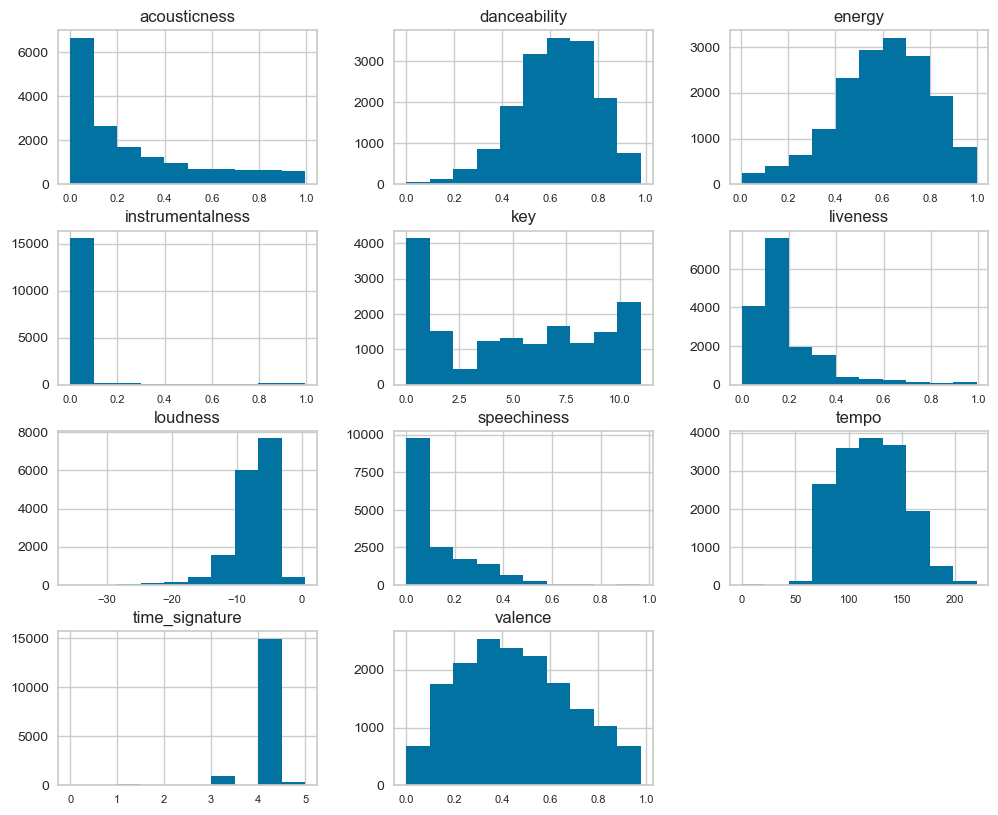

In [11]:
features_df.hist(xlabelsize=8, figsize=(12,10))

#### Scaling the data

In [5]:
for col in ['loudness', 'tempo', 'key', 'time_signature']:
    features_df[col] = ((features_df[col] - features_df[col].min()) / (features_df[col].max() - features_df[col].min()))
scaled_data = features_df 
scaled_data

<ipython-input-5-9839bf7bab1c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,track_id
0,0.58700,0.354,0.540,0.000000,0.272727,0.1120,0.802943,0.0323,0.317902,0.8,0.416,4qeMbs55QlONyrE9YBMA93
1,0.37100,0.505,0.658,0.001360,1.000000,0.1210,0.841318,0.0318,0.890517,0.6,0.255,4xv9BDq764NSKG3geku9X2
2,0.66500,0.658,0.539,0.000000,0.454545,0.1230,0.773877,0.0289,0.622261,0.8,0.622,7cWMnSxmQfKFsIIoRWifbb
3,0.24400,0.488,0.748,0.000000,0.545455,0.1240,0.818902,0.0297,0.385908,0.8,0.431,6Mn2GFiNNadK0G2ZXRK1fd
4,0.72900,0.454,0.586,0.000000,0.727273,0.1010,0.840930,0.0253,0.399325,0.8,0.366,3lb2f27695Iuyd82khwU9k
...,...,...,...,...,...,...,...,...,...,...,...,...
16496,0.64500,0.524,0.523,0.000000,0.090909,0.1010,0.843811,0.0268,0.654306,0.8,0.313,1VwuDXLQdyTWvieBIPWkNt
16497,0.26300,0.576,0.766,0.000004,0.090909,0.1020,0.859217,0.0304,0.649839,0.8,0.407,2gFkkpMs7rakuCCi9UepP0
16498,0.00323,0.572,0.840,0.000013,0.181818,0.5590,0.813970,0.0341,0.606427,0.8,0.505,7G2BnhS46nEiPucLNvE0G3
16499,0.48600,0.559,0.692,0.000004,0.636364,0.1250,0.770469,0.0385,0.408698,0.8,0.567,32zF5eXrb8QrUu5qNdYmIO


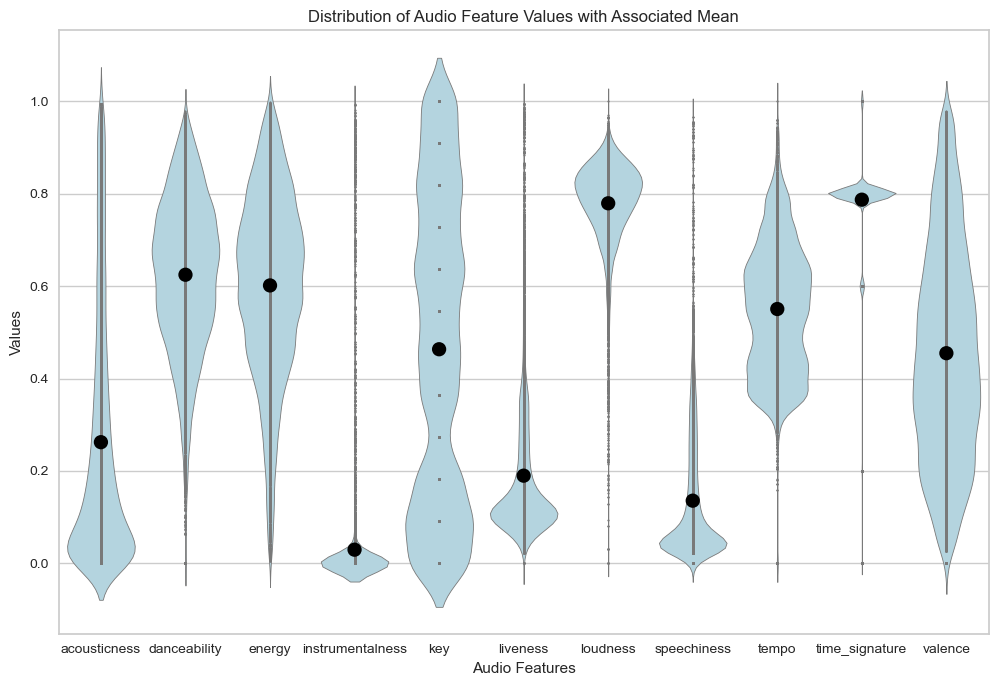

<Figure size 1200x800 with 0 Axes>

In [13]:
features_melt = features_df.melt(var_name='groups', value_name='vals')
ax = sns.violinplot(x="groups", y="vals", data=features_melt, linewidth = 0.6, inner = 'point', scale= 'width', color="lightblue")
sns.pointplot(x = "groups", y="vals", data=features_melt, estimator = mean, color="black", marker="^", linestyles="", ci=None)
plt.title('Distribution of Audio Feature Values with Associated Mean')
plt.xlabel('Audio Features')
plt.ylabel('Values')
plt.show()
plt.savefig('../viz/pyplots/ViolinDistofAudioFeatureValues.png')

## K Means Clustering

#### Determining the cluster size

In [14]:
score_list = []
for i in range(2,10):
    kmeans_model = KMeans(n_clusters=i, random_state=3).fit(features_df)
    preds = kmeans_model.predict(features_df)
    score_list.append(kmeans_model.inertia_)

#### Elbow Method Visualization of different cluster sizes

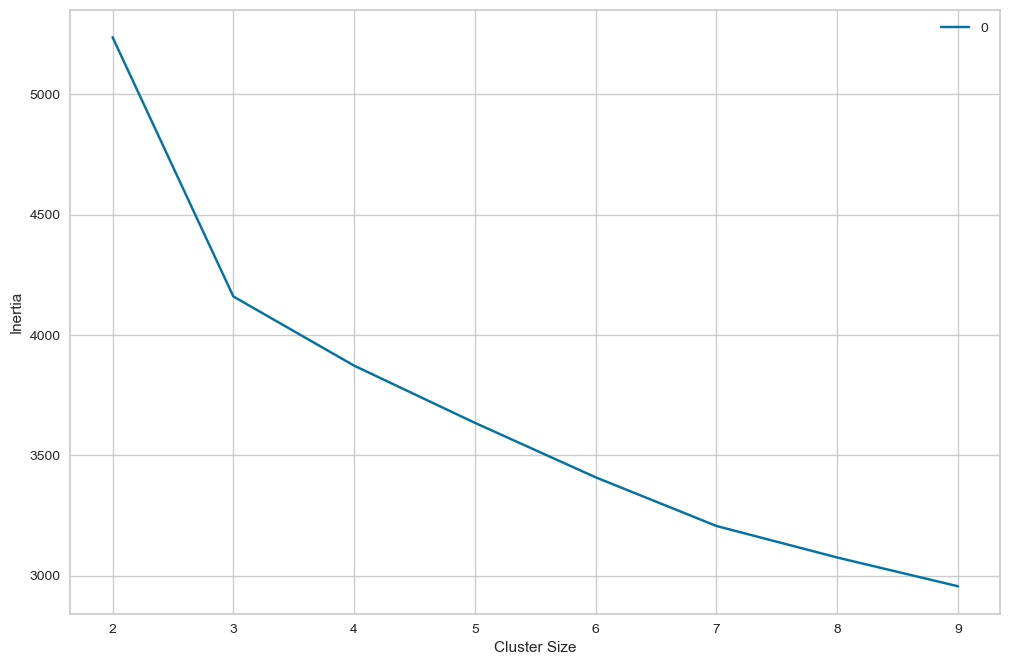

In [20]:
pd.DataFrame(score_list, index=range(2, 10)).plot().set(xlabel="Cluster Size", ylabel="Inertia")
plt.savefig('../viz/pyplots/kmeans_initial_elbow.png')

#### Loop for best permutations of feature combinations for clustering with visualization of possible elbows

100%|██████████| 165/165 [1:09:22<00:00, 25.23s/it]


<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

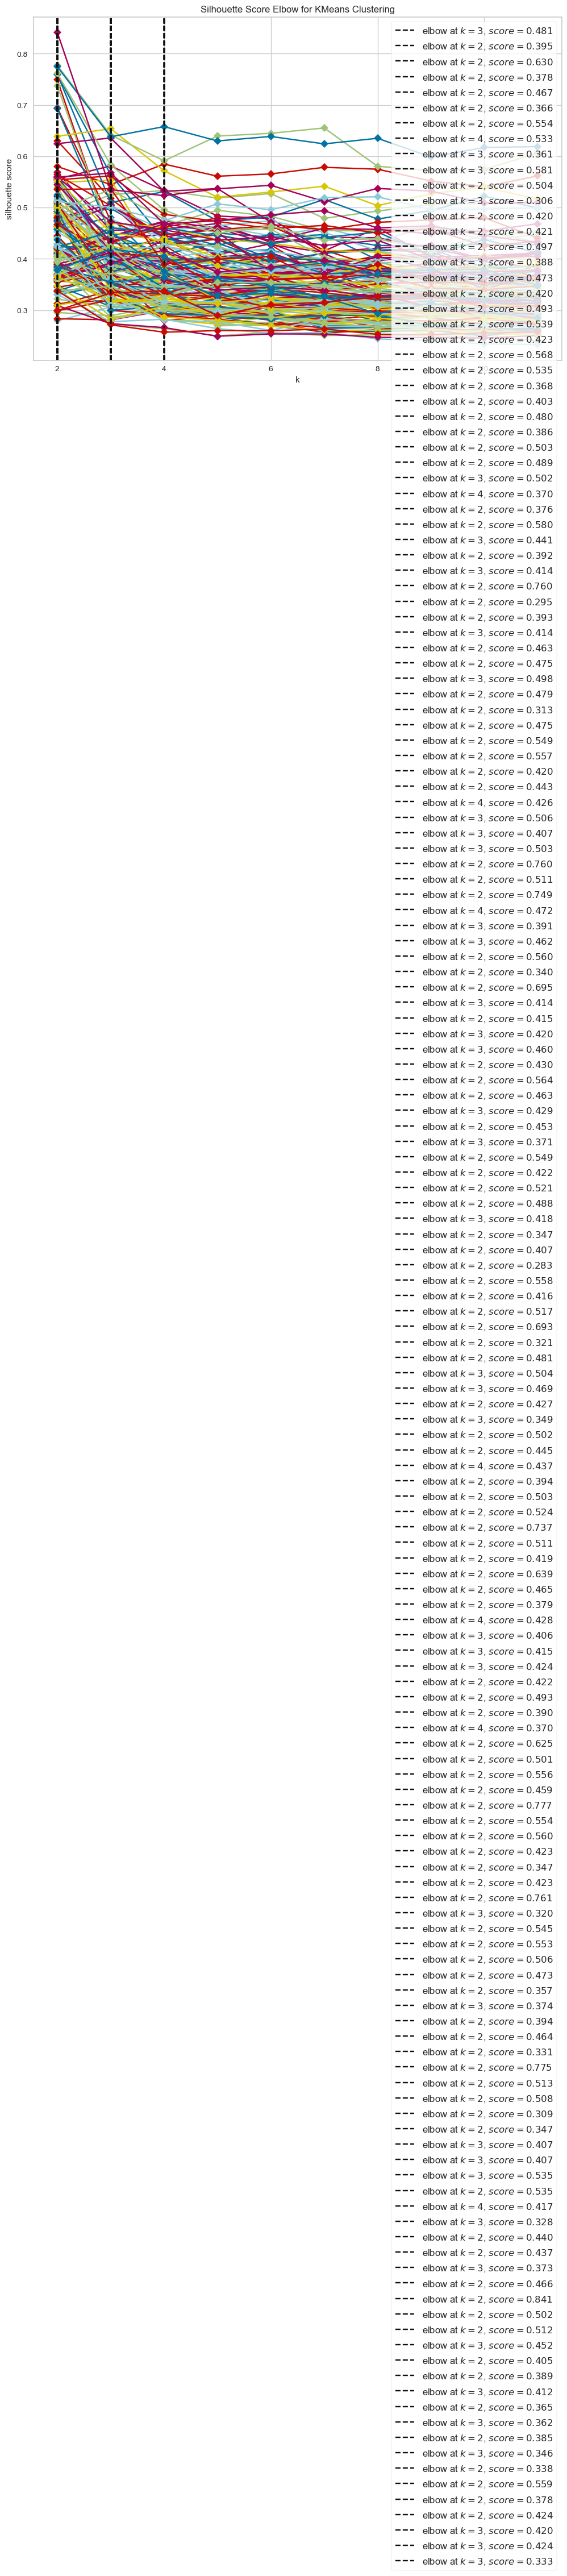

In [10]:
perm = permutations(columns, 3)
output = set(map(lambda x: tuple(sorted(x)),perm))
a=[]
column_names = ["features", "score", "elbow"]
kmeans_scores = pd.DataFrame(columns = column_names)

for i in tqdm(list(output)):
    df1 = features_df[[i[0], i[1], i[2]]]
    x = df1.values  # returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)

    model = KMeans(random_state=3)
    visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False)
    visualizer.fit(x_scaled)
    score = visualizer.elbow_score_
    value = visualizer.elbow_value_
    if score>0.5:
        # visualizer.show()
        idx = df1.columns
        mylist = idx.tolist()
        dict = {
            "features": mylist,
            "score": score,
            "elbow": value
        }
        kmeans_scores = kmeans_scores.append(dict, ignore_index=True)
visualizer.show(outpath="../viz/pyplots/kmeans_elbow_permutations.png")

#### View the resulting dataset of elbows with the highest score for clustering

In [7]:
kmeans_scores

,features,score,elbow
0,"['acousticness', 'loudness', 'time_signature']",0.630207,2
1,"['acousticness', 'energy', 'instrumentalness']",0.553607,2
2,"['instrumentalness', 'liveness', 'speechiness']",0.533339,4
3,"['instrumentalness', 'key', 'loudness']",0.581160,3
4,"['acousticness', 'liveness', 'speechiness']",0.503862,2
5,"['acousticness', 'danceability', 'time_signatu...",0.539433,2
6,"['acousticness', 'speechiness', 'time_signature']",0.568422,2
7,"['acousticness', 'danceability', 'loudness']",0.534597,2
8,"['key', 'liveness', 'loudness']",0.503276,2
9,"['energy', 'instrumentalness', 'time_signature']",0.501529,3


In [8]:
kmeans_scores.to_csv('../data/Kmeans_Scores.csv', index=False)

#### Optional load of csv if not running permutation code
kmeans_scores = pd.read_csv('../data/Kmeans_Scores.csv')

kmeans_scores

#### Select most well-clustered group of features

In [21]:
max_cluster_3 = kmeans_scores.sort_values(["elbow", "score"], ascending = (False, False))
max_cluster_3

,Unnamed: 0,features,score,elbow
2,2,"['instrumentalness', 'liveness', 'speechiness']",0.533339,4
3,3,"['instrumentalness', 'key', 'loudness']",0.581160,3
47,47,"['instrumentalness', 'time_signature', 'valence']",0.534843,3
14,14,"['danceability', 'instrumentalness', 'key']",0.506165,3
27,27,"['danceability', 'instrumentalness', 'time_sig...",0.503687,3
15,15,"['instrumentalness', 'loudness', 'valence']",0.503424,3
9,9,"['energy', 'instrumentalness', 'time_signature']",0.501529,3
49,49,"['instrumentalness', 'loudness', 'time_signatu...",0.841490,2
37,37,"['instrumentalness', 'liveness', 'time_signatu...",0.777018,2
44,44,"['instrumentalness', 'speechiness', 'time_sign...",0.774674,2


#### KMeans for top cluster

In [22]:
# input matrix for segmentation
x_3d = scaled_data[['instrumentalness','liveness','speechiness']].values
x_3d

array([[0.00e+00, 1.12e-01, 3.23e-02],
       [1.36e-03, 1.21e-01, 3.18e-02],
       [0.00e+00, 1.23e-01, 2.89e-02],
       ...,
       [1.33e-05, 5.59e-01, 3.41e-02],
       [4.34e-06, 1.25e-01, 3.85e-02],
       [9.81e-05, 8.64e-02, 3.08e-02]])

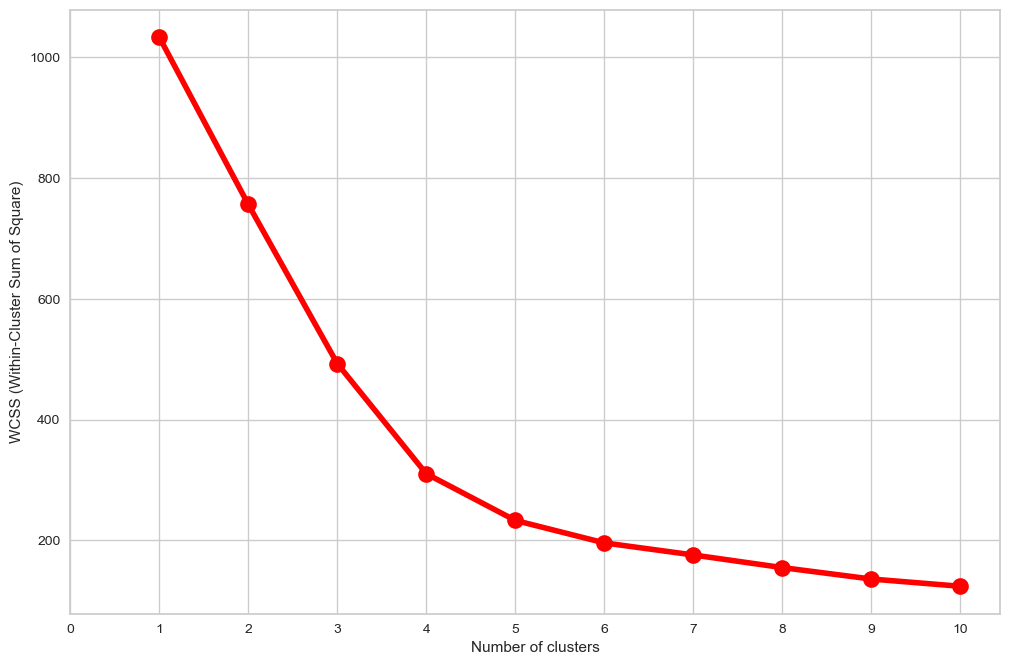

<Figure size 1200x800 with 0 Axes>

In [23]:
# View the elbow for 3 features = ['instrumentalness','liveness','speechiness']

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x_3d)
    WCSS.append(model.inertia_)
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Square)")
plt.show()
plt.savefig('../viz/pyplots/kmeans_elbow_ils.png')

In [24]:
# finding the clusters based on input matrix "x_3d"
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 3)
y_clusters = model.fit_predict(x_3d)

/Users/katherineravenwood/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



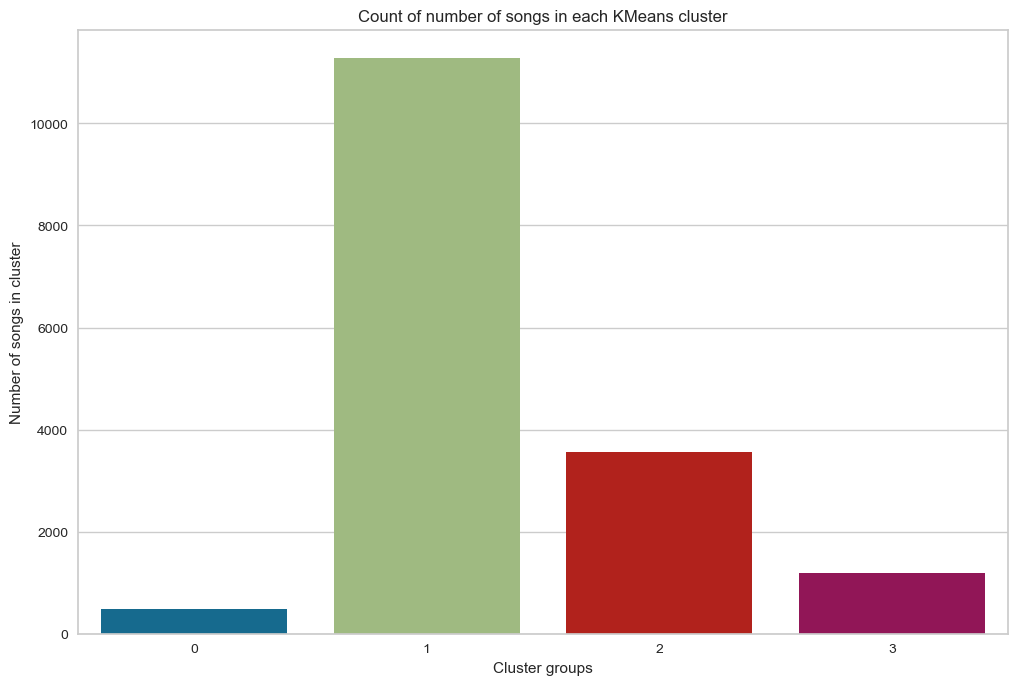

In [25]:
# countplot to check the number of clusters and number of songs in each cluster
sns.countplot(y_clusters)
plt.title("Count of number of songs in each KMeans cluster")
plt.xlabel("Cluster groups")
plt.ylabel("Number of songs in cluster")
plt.savefig('../viz/pyplots/kmeans_clusters_bar_chart.png')

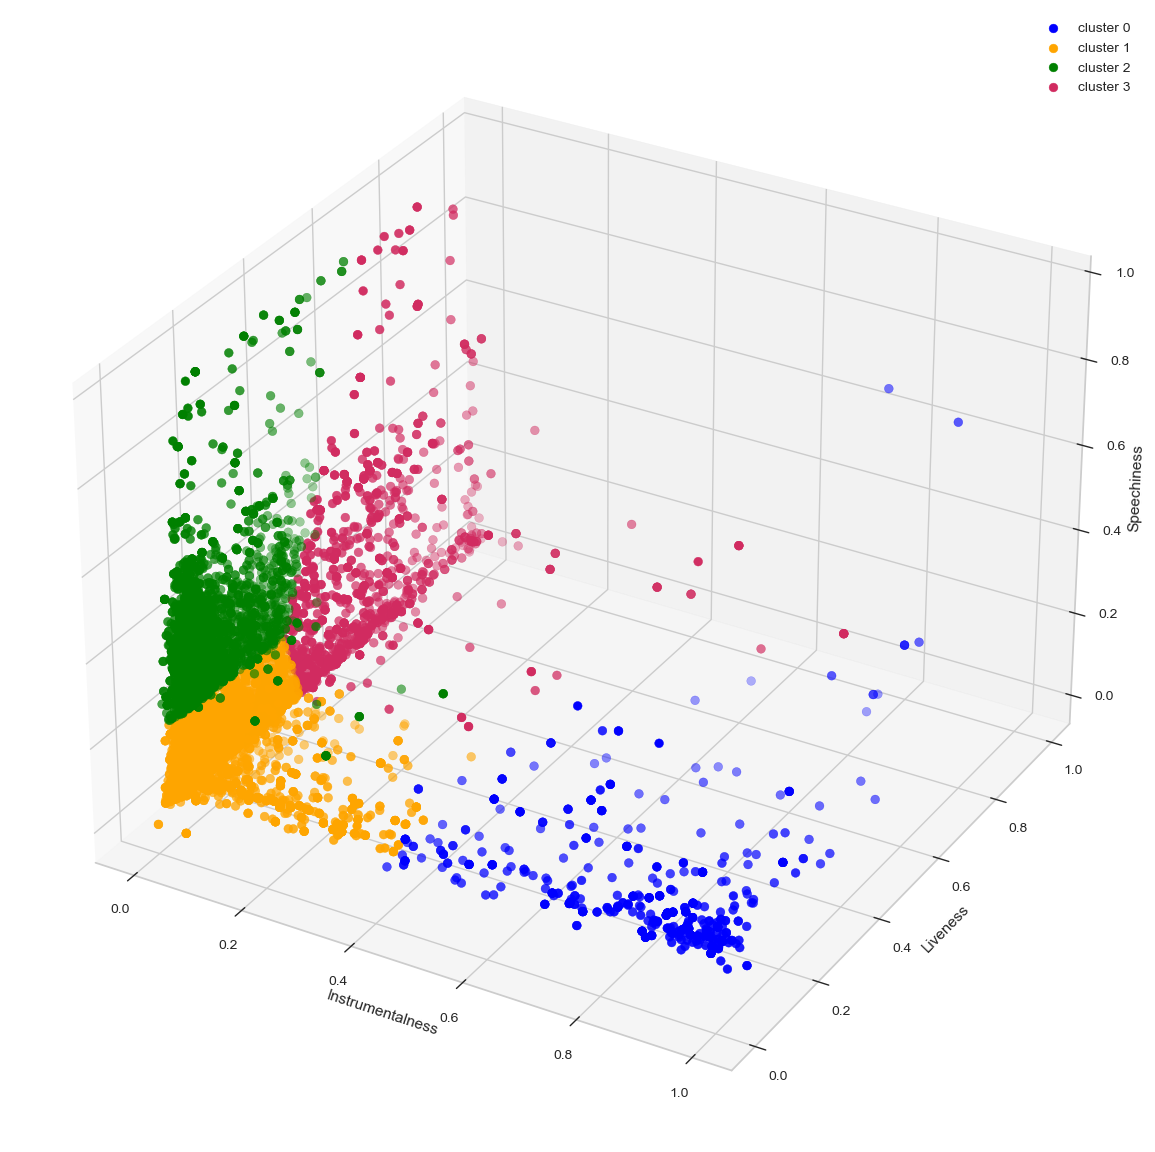

<Figure size 1200x800 with 0 Axes>

In [26]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_3d[y_clusters == 0,0],x_3d[y_clusters == 0,1],x_3d[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x_3d[y_clusters == 1,0],x_3d[y_clusters == 1,1],x_3d[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x_3d[y_clusters == 2,0],x_3d[y_clusters == 2,1],x_3d[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x_3d[y_clusters == 3,0],x_3d[y_clusters == 3,1],x_3d[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.set_xlabel('Instrumentalness')
ax.set_ylabel('Liveness')
ax.set_zlabel('Speechiness')
ax.legend()
plt.show()
plt.savefig('../viz/pyplots/kmeans_ils_3d_scatter.png')

In [113]:
# 3d scatterplot using plotly
s_scene = {'xaxis' : {'title':'Instrumentalness'}, 'yaxis' : {'title' : 'Liveness'}, 'zaxis' : {'title' : 'Speechiness'} }

# model.labels is the predicted clusters from y_clusters
labels = model.labels_
data = [go.Scatter3d(x=x_3d[:, 0], y=x_3d[:, 1], z=x_3d[:, 2], mode='markers',marker= {'color' : labels, 'size' : 5, 'line' : { 'color' : 'black', 'width' : 10}})]
layout = go.Layout(margin={"l":0,"r":0}, scene = s_scene, height = 800, width = 800)
fig = go.Figure(data = data, layout = layout)
fig.show()

#### Generate playlists based on clusters

In [98]:
# Load cred.py for API access
%run -i 'creds.py'

In [ ]:
# Set credentials
client_credentials_manager = SpotifyClientCredentials(client_id=client_id,client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

#Credentials to access the Spotify Music Data
manager = SpotifyClientCredentials(client_id,client_secret)
sp = spotipy.Spotify(client_credentials_manager=manager)

#Credentials to access to  the Spotify User's Playlist, Favorite Songs, etc. 
token = util.prompt_for_user_token(username,scope,client_id,client_secret,redirect_uri) 
spt = spotipy.Spotify(auth=token)

In [103]:
# Create a new column from cluster list
features_df_track['cluster'] = y_clusters

<ipython-input-103-042681ff4b24>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
# Separate the clusters into new variables
cluster_0 = features_df_track[features_df_track['cluster']==0]
cluster_1 = features_df_track[features_df_track['cluster']==1]
cluster_2 = features_df_track[features_df_track['cluster']==2]
cluster_3 = features_df_track[features_df_track['cluster']==3]

In [111]:
# Convert the list of track ids for each cluster into a list
ids_0 = cluster_0['track_id'].tolist()
ids_1 = cluster_1['track_id'].tolist()
ids_2 = cluster_2['track_id'].tolist()
ids_3 = cluster_3['track_id'].tolist()

#Working on authorization flow (WIP)
#Create 4 new playlists in my spotify library
pl_cluster_0 = sp.user_playlist_create(user=username,
                                           name="Cluster 0")
pl_cluster_1 = sp.user_playlist_create(user=username,
                                            name="Cluster 1")
pl_cluster_2 = sp.user_playlist_create(user=username,
                                            name="Cluster 2")
pl_cluster_3 = sp.user_playlist_create(user=username,
                                            name="Cluster 3")

#Working on authorization flow (WIP)
#Adding the tracks into the playlists
#For Cluster 0 Playlist
sp.user_playlist_add_tracks(user=username,
                            playlist_id = pl_cluster_0['id'],
                            tracks=ids_0)
#For Cluster 1 Playlist
sp.user_playlist_add_tracks(user=username,
                            playlist_id = pl_cluster_1['id'],
                            tracks=ids_1)

#For Cluster 2 Playlist
sp.user_playlist_add_tracks(user=username,
                            playlist_id = pl_cluster_2['id'],
                            tracks=ids_2)

#For Cluster 3 Playlist
sp.user_playlist_add_tracks(user=username,
                            playlist_id = pl_cluster_3['id'],
                            tracks=ids_3)


## Genre Classifcation

### Using K Nearest Neighbors

#### Select the features to target

In [28]:
atacj['target'] = atacj['main_genre']

In [29]:
X = features_df

In [30]:
y = atacj.target
%store X

Stored 'X' (DataFrame)


In [31]:
%store y

Stored 'y' (Series)


In [32]:
y.head()

0    Country
1    Country
2    Country
3    Country
4    Country
Name: target, dtype: object

#### Scaling features

In [33]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

scaled_df = pd.DataFrame(X, columns=X.columns)
scaled_df.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,0.587,0.354,0.540,0.00000,0.272727,0.112,0.802943,0.0323,0.317902,0.8,0.416
1,0.371,0.505,0.658,0.00136,1.000000,0.121,0.841318,0.0318,0.890517,0.6,0.255
2,0.665,0.658,0.539,0.00000,0.454545,0.123,0.773877,0.0289,0.622261,0.8,0.622
3,0.244,0.488,0.748,0.00000,0.545455,0.124,0.818902,0.0297,0.385908,0.8,0.431
4,0.729,0.454,0.586,0.00000,0.727273,0.101,0.840930,0.0253,0.399325,0.8,0.366


In [34]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=3)

#### Elbow Method for selecting best k value:

In [35]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predI = knn.predict(X_test)
    errorRate.append(np.mean(predI != y_test))

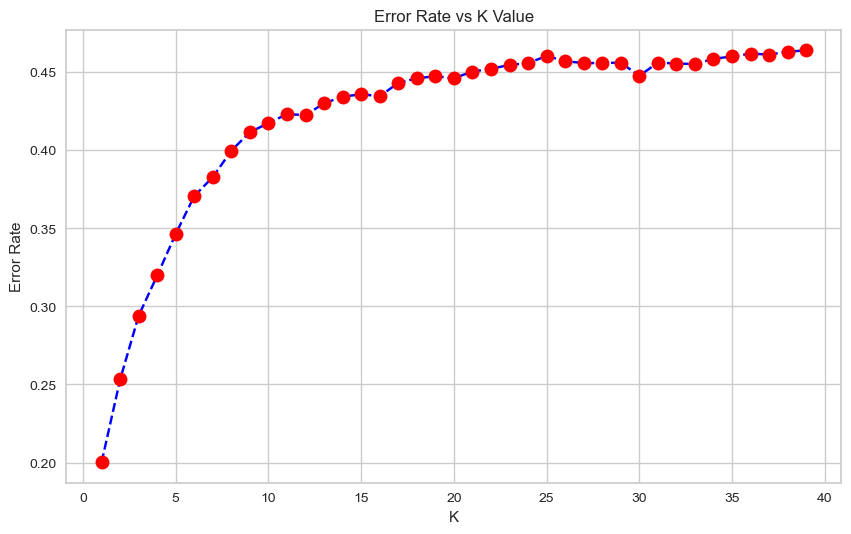

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.savefig('../viz/pyplots/knn_error_plot.png')

#### Attempting multiple K values for K Nearest Neighbors

In [37]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds, average='micro')
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [38]:
find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25)

Best Value for k: 1
F1-Score: 0.7997576491972128


#### Selected Optimal K value for model: 1

In [39]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [40]:
print(confusion_matrix(y_test, pred))

[[   8    0    0    0    0    0    0    0    0    0    1    0    3    0
     0    1    0    1]
 [   0  238    1    2    1    0    5    0    0    4    2    3   26    1
     0   16    0    6]
 [   0    3   30    0    0    0    2    0    0    0    0    0    4    1
     0    1    0    2]
 [   0    2    0    1    0    0    4    0    0    0    0    1    0    0
     0    2    0    2]
 [   0    0    0    0    2    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    2    0    0    0    1    0    0    0    0    0    0    1    1
     0    0    0    0]
 [   0   18    4    5    0    0 1075    0    0    7    1    3   96   15
     1   18    0   16]
 [   0    1    0    0    0    0    0    4    0    0    0    0    0    0
     0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0    0    0    1    1
     0    0    0    0]
 [   0    1    0    0    0    0   16    0    0   19    0    1    8    1
     0    1    0    0]
 [   0    2    0    0    0    0    1    0    0    

In [41]:
print(classification_report(y_test,pred))

                precision    recall  f1-score   support

     Christian       0.62      0.57      0.59        14
       Country       0.72      0.78      0.75       305
Easy_listening       0.79      0.70      0.74        43
           Edm       0.12      0.08      0.10        12
          Folk       0.40      1.00      0.57         2
          Funk       0.50      0.20      0.29         5
       Hip-hop       0.88      0.85      0.87      1259
         Indie       1.00      0.80      0.89         5
          Jazz       0.00      0.00      0.00         3
         Latin       0.47      0.40      0.44        47
         Metal       0.87      0.89      0.88        45
          Misc       0.74      0.70      0.72        53
           Pop       0.76      0.75      0.75       773
           R&B       0.65      0.68      0.66       118
        Reggae       0.81      1.00      0.90        13
          Rock       0.84      0.90      0.87       402
          Soul       0.71      0.77      0.74  

#### Classification Scores on Test Set

In [42]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average='micro')))
    print("Recall Score: {}".format(recall_score(labels, preds, average='micro')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average='micro')))
    
print_metrics(y_test, pred)

Precision Score: 0.7997576491972129
Recall Score: 0.7997576491972129
Accuracy Score: 0.7997576491972129
F1 Score: 0.7997576491972128


### Random Forest Genre Classification

#### Store variables

In [43]:
%store -r X

In [44]:
%store -r y

In [45]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

scaled_df = pd.DataFrame(X, columns=X.columns)
scaled_df.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,0.587,0.354,0.540,0.00000,0.272727,0.112,0.802943,0.0323,0.317902,0.8,0.416
1,0.371,0.505,0.658,0.00136,1.000000,0.121,0.841318,0.0318,0.890517,0.6,0.255
2,0.665,0.658,0.539,0.00000,0.454545,0.123,0.773877,0.0289,0.622261,0.8,0.622
3,0.244,0.488,0.748,0.00000,0.545455,0.124,0.818902,0.0297,0.385908,0.8,0.431
4,0.729,0.454,0.586,0.00000,0.727273,0.101,0.840930,0.0253,0.399325,0.8,0.366


In [46]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.3, random_state=3)
forest = RandomForestClassifier(random_state=3)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=3)

In [47]:
forest.score(X_test, y_test)

0.8359927287416683

#### Plot the feature importances for the baseline forest model

In [48]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

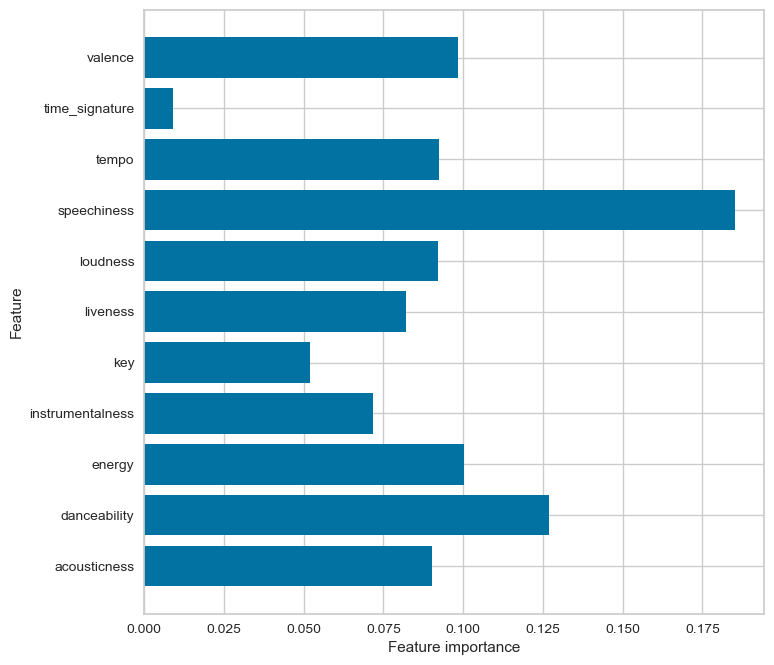

In [49]:
plot_feature_importances(forest)
plt.savefig('../viz/pyplots/rf_feature_importances.png')

#### View the confusion matrix for the baseline model

In [50]:
pred = forest.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[  12    3    0    0    0    0    0    0    0    0    0    0    8    0
     0    2    0    0]
 [   0  358    0    0    0    0    6    0    0    0    2    1   44    0
     0   38    0    1]
 [   0    0   39    0    0    0    4    0    0    0    0    0   12    0
     0    6    0    1]
 [   0    1    1    0    0    0    5    0    0    0    0    0    3    0
     0    3    0    0]
 [   0    0    0    0    8    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    1    0    0    0    0    0    0    4    0
     0    3    0    0]
 [   0    3    0    0    0    0 1782    0    0    0    3    0   98    1
     0    6    0    3]
 [   0    2    0    0    0    0    0    4    0    0    0    0    1    0
     0    2    0    0]
 [   0    2    0    0    0    0    1    0    0    0    0    0    1    0
     0    0    0    0]
 [   0    2    0    0    0    0   25    0    0   27    0    0   10    0
     0    0    0    0]
 [   0    5    0    0    0    0    0    0    0    

/Users/katherineravenwood/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/katherineravenwood/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/katherineravenwood/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [51]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average='micro')))
    print("Recall Score: {}".format(recall_score(labels, preds, average='micro')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average='micro')))
    
print_metrics(y_test, pred)

Precision Score: 0.8359927287416683
Recall Score: 0.8359927287416683
Accuracy Score: 0.8359927287416683
F1 Score: 0.8359927287416684


#### Model Results & Conclusions
Baseline model was accurate at predicting genre 84% of the time. Hyperparameter tuning may yield better results.

### Hyperparameter tuning

#### Parameters currently in use on baseline classifier:

In [44]:
# Look at parameters used by the forest with default hyperparameters
print('Parameters currently in use:\n')
print(forest.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 3, 'verbose': 0, 'warm_start': False}


#### Create a hyperparameter grid for random testing

In [45]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

#### Instantiate the random search and fit it:

In [46]:
# Use the random grid to search for best hyperparameters
# Base model already created as:
# forest = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
start = time.time()
forest_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=3, n_jobs = -1)
# Fit the random search model
forest_random.fit(X_train, y_train)
end = time.time()

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/katherineravenwood/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



####  Recommended best parameters

Output best parameters from random search

In [47]:
forest_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

#### Compare the base model with the best random search model

Baseline: 

In [48]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.3, random_state=3)
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
forest.score(X_test, y_test)

0.8333669965663503

Best random search:

In [50]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.3, random_state=3)
forest_random = RandomForestClassifier(n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features="sqrt", max_depth= 100, bootstrap=False)
forest_random.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=100, max_features='sqrt',
                       n_estimators=1200)

In [51]:
forest_random.score(X_test, y_test)

0.8374065845283781

The best random search model improved classification accuracy by 0.21%. Will plan for continued hyperparameter tuning.

#### Visualize a truncated tree from the forest
This visualization only functions as an incomplete example as it truncates the example tree at 3 levels|. A more complete, if overlapping, visual can be accessed via the RandomForestExpandedPlot.ipynb notebook. 

In [52]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.3, random_state=3)
forest_random_viz = RandomForestClassifier(n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features="sqrt", max_depth= 3, bootstrap=False)
forest_random_viz.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=3, max_features='sqrt',
                       n_estimators=10)

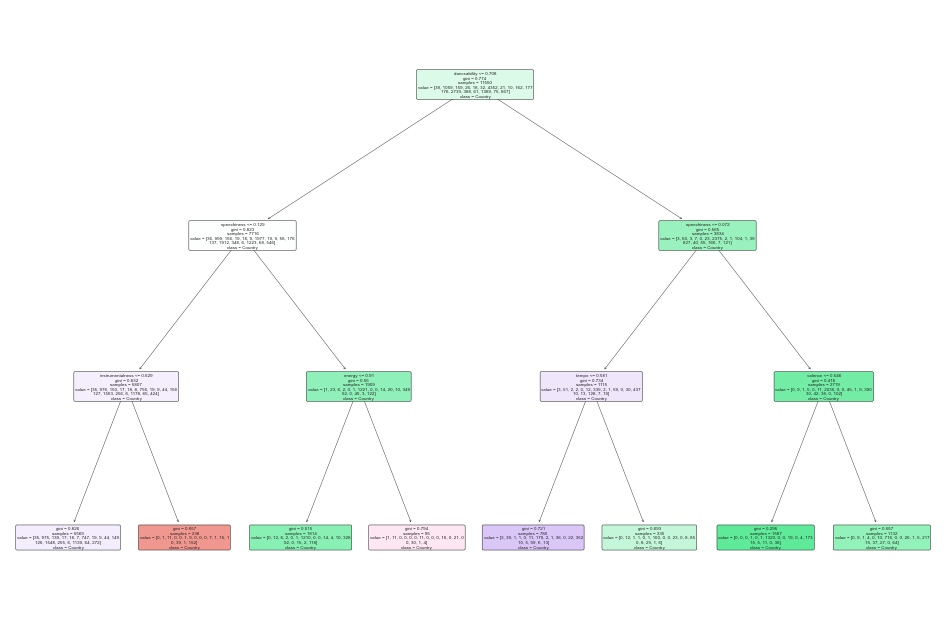

In [53]:
plot_tree(forest_random_viz.estimators_[5], 
          feature_names = scaled_df.columns,
          class_names = atacj['target'],
          filled=True, impurity=True, 
          rounded=True)
plt.savefig('../viz/pyplots/example_tree_plot.png')